# ML Capstone Project - E Commerce

## Introduction
##### We have got an electronic E-commerce comprehensive data set from kaggle for performing the predictive modelling to enhance the sales and customer loyalty.
##### This dataset encapsulates a wide array of variables, providing insights into various aspects of E-Commerce operations and customer interactions. Containing multiple tables and data points, this dataset offers ample opportunities for research, trend analysis, and the development of predictive models to enhance decision-making processes within the e-commerce industry. 
##### For enhancing the customer loyalty we can check the product quality, price range, delievery time, frequency of order, availability of the product and priortise the potential customers and give them the special discounts and for enhancing the sales can be done by prdicting the total revenue, product price range, average order price, yearly sales growth, and future requirement of the product.
##### Our solution to be dynamic and robust enough to enhance the marketing strategies as well as the customer experience in E-Commerce.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


### Data Dictionary 
        Data disctionary helps in understanding the data set, it gives the information about the datat set, and it includes the brief 
        overview of data.

In [2]:
data_col = ["event_time", "order_id", "product_id","category_id","category_code","brand","price","user_id"]
data_des = ["Represents the timestamp indicating the occurrence of a purchase or related event and vital for analyzing purchase patterns across time",
            "A unique identifier assigned to each order, facilitating individual transaction tracking and crucial for distinguishing between different orders during analysis",
            "Unique identification for each product purchased, pivotal for product-level analysis and identification of specific items",
            "An exclusive identifier for the category of each product. Aids in categorizing products for comprehensive analysis",
            "Possibly a textual or descriptive representation of the product category. It offers a more intuitive understanding than category IDs regarding product types",
            "Signifies the brand of the product, important for brand-level analysis and understanding customer brand preferences",
            "The selling price of the product, essential for revenue analysis and comprehending purchasing patterns concerning different price points",
            "A distinctive identifier assigned to each customer, enables analysis on a customer level, including purchase history, frequency, and preferences"
            ]
d = {'data_col':data_col, 'data_des':data_des}
df_data_dict = pd.DataFrame(d)
df_data_dict

,data_col,data_des
0,event_time,Represents the timestamp indicating the occurr...
1,order_id,"A unique identifier assigned to each order, fa..."
2,product_id,Unique identification for each product purchas...
3,category_id,An exclusive identifier for the category of ea...
4,category_code,Possibly a textual or descriptive representati...
5,brand,"Signifies the brand of the product, important ..."
6,price,"The selling price of the product, essential fo..."
7,user_id,A distinctive identifier assigned to each cust...


### Data Ingestion

In [3]:
data_set = pd.read_csv("../Data/kz.csv")
data_set.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [4]:
data_set.tail()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18
2633520,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18


### Data Understanding

In [5]:
data_set.info( show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     2633521 non-null  object 
 1   order_id       2633521 non-null  int64  
 2   product_id     2633521 non-null  int64  
 3   category_id    2201567 non-null  float64
 4   category_code  2021319 non-null  object 
 5   brand          2127516 non-null  object 
 6   price          2201567 non-null  float64
 7   user_id        564169 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


        Data set is having total 8 columns and total 2633521 rows. 
        event_time, category_code, and brand column have a textual data.
        order_id, product_id, category_id, price, and user_id columns have a numerical data

In [6]:
cols = data_set.columns
cols

Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id'],
      dtype='object')

        ".columns" helps in getting the index of all columns in a dataframe and stored in a variable named cols 

In [7]:
round(data_set[['category_id', 'category_code','brand', 'price', 'user_id']].isna().sum()*100/data_set.shape[0],2)

category_id      16.40
category_code    23.25
brand            19.21
price            16.40
user_id          78.58
dtype: float64

        Check for the percentage of null values: 
        calculated the % of null values for columns having the null values.
        'user_id' column have the highest number of null values i.e. 78.58%.

In [8]:
data_set[data_set.duplicated()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
7,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18
8,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18
9,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1.515916e+18
...,...,...,...,...,...,...,...,...
2623318,2020-11-19 17:11:05 UTC,2388440981134688081,2388434452474178202,2.268105e+18,electronics.audio.headphone,hyperx,74.05,1.515916e+18
2632704,2020-11-20 07:34:17 UTC,2388440981134693250,1515966223509089405,2.268105e+18,electronics.smartphone,apple,208.31,1.515916e+18
2632822,2020-11-20 09:52:06 UTC,2388440981134693354,2309018260105855661,2.268106e+18,NaN,palisad,1.37,1.515916e+18
2633140,2020-11-20 18:23:21 UTC,2388440981134693620,2388434452476503038,2.268105e+18,electronics.smartphone,apple,856.23,1.515916e+18


In [9]:
data_set.duplicated().sum()

675

        1) ".duplicated()" helps in getting the duplicated rows in a data set and return the boolean values. 
        2) True => duplicated & False => Not duplicated.
        3) ".sum()" helps in getting the total sum of duplicated values. (True => 1, and False => 0).
        4) In the data set there are 675 duplicate rows and by passing the duplicated() function prints the dataframe to visualise 
           the duplicated rows.

In [10]:
data_set.describe()

,order_id,product_id,category_id,price,user_id
count,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
std,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.377083e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18


        ".describe()" returns the statistical analysis of a dataset contains the numerical columns.
        It return the count, mean, standard deviation, min, max, and quartiles of a numerical columns. 

In [11]:
data_set['price'].min()

0.0

In [12]:
data_set['price'].max()

50925.9

        There are certain products which have the price is zero.

### Data Cleaning

        Dats set have two columns category_id, and user_id values are represented as a exponential.
        Changing there format to normal to have the better readability. 

In [13]:
pd.options.display.float_format = '{:.0f}'.format

        ".float_format" is used to change the format of the columns from exponential to normal.

In [14]:
data_set.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,electronics.tablet,samsung,162,1515915625441993984
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,electronics.tablet,samsung,162,1515915625441993984
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760,electronics.audio.headphone,huawei,78,1515915625447879424
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760,electronics.audio.headphone,huawei,78,1515915625447879424
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000,NaN,karcher,218,1515915625443148032


        "category_code" columns contains the category of product, and which sub category it belongs and separated by ".".
        split the column to get the new column. 

In [15]:
data_set['category_code'].sample(10)

1276742        furniture.kitchen.table
827654          electronics.smartphone
695060                            9.26
2632673    computers.components.cooler
646457                             NaN
1894285                            NaN
1091250                            NaN
742327                           57.87
682193       appliances.kitchen.washer
473905                           29.63
Name: category_code, dtype: object

        'category_code' column have numerical values, values are belongs to a 'price' column
        extracting the numerical(float) values from it and creating a new column "category_price" 

In [16]:
data_set['category_price'] = data_set['category_code'].str.extract('(\d+\.\d+)')

In [17]:
data_set['category_price'].notnull().sum()

431954

        In new column "category_price" there are '431954' rows of entries.
        Creating a series with index of rows where values are not null in 'category_price' column

In [18]:
price_idx = data_set[data_set['category_price'].notnull()].index

        Replacing the numerical values of 'category_code' column by 'nan', because we have already stored the numerical values in 
        another column so there is no need it in that column.
        Using the '.loc' for getting the particular index rows and values are repalced by using the 'np.nan' to repalce by 'NaN'. 

In [19]:
data_set.loc[price_idx, 'category_code'] = np.nan

        check the column 'category_code' by random sampling using the '.sample()', found that there is no numerical value.

In [20]:
data_set['category_code'].sample(10)

1101867     electronics.smartphone
2498012    appliances.kitchen.oven
2207133                        NaN
2543881       electronics.video.tv
1835588                        NaN
308063     furniture.kitchen.chair
2140909                        NaN
890089      electronics.smartphone
653298                         NaN
2194609                        NaN
Name: category_code, dtype: object

        'category_code' have no numerical values so now we can split this column by using the '.str.split()' and create a new column.
        '.str' is used to make the data type to be string and then use the '.split('.')' to split it by '.' 
        new column name be 'category'.

In [21]:
data_set['category'] = data_set['category_code'].str.split('.')

In [22]:
data_set['category'].head()

0              [electronics, tablet]
1              [electronics, tablet]
2    [electronics, audio, headphone]
3    [electronics, audio, headphone]
4                                NaN
Name: category, dtype: object

        successfully split the 'category_code' and values are separated by ','.
        creating a new column 'major_category' with the major category as the products belong to different category.
        To do the analysis over major catgory of products.
        By slicing the string, as column values are the list of strings to extract the first values of list.   

In [23]:
data_set['major_category'] = data_set['category'].str[0]

In [24]:
data_set['major_category'].value_counts()

major_category
appliances      608905
electronics     549058
computers       222637
furniture       121373
stationery       39550
accessories      13620
construction     12614
apparel           7742
kids              5003
medicine          3386
auto              3262
sport             1900
country_yard       315
Name: count, dtype: int64

        The data set have different categories of proucts and 'value_counts' giving the count of values of different product categories
        ordered by the different users.

In [25]:
data_set.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   event_time      2633521 non-null  object 
 1   order_id        2633521 non-null  int64  
 2   product_id      2633521 non-null  int64  
 3   category_id     2201567 non-null  float64
 4   category_code   1589365 non-null  object 
 5   brand           2127516 non-null  object 
 6   price           2201567 non-null  float64
 7   user_id         564169 non-null   float64
 8   category_price  431954 non-null   object 
 9   category        1589365 non-null  object 
 10  major_category  1589365 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 221.0+ MB


        'price' column have null values, can be filled up by the 'category_price'. 
        'idx' variable is defined to get the index of the rows of the column 'category_price' have the values.
        Apply 'for loop' to access the values by index wise.
        To fill the null values we use '.at' by index wise. 

In [26]:
idx = data_set[data_set['category_price'].notnull()].index
for i in idx:
    data_set.at[i, 'price'] = data_set.at[i, 'category_price']

        Checking the values of 'price' column.

In [27]:
data_set['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2633521 entries, 0 to 2633520
Series name: price
Non-Null Count    Dtype 
--------------    ----- 
2633521 non-null  object
dtypes: object(1)
memory usage: 20.1+ MB


        'price' column have now no null values which makes it a clean column for the further analysis.
        Drop the 'category_price', is not required for the furter analysis.

In [28]:
data_set = data_set.drop('category_price', axis = 1)

In [30]:
data_set[['brand','user_id']].sample(10)

,brand,user_id
244061,ausini,NaN
2568859,genius,1515915625498175232
1488057,1515915625452630196,NaN
2508538,roadx,1515915625505095936
1109071,xiaomi,NaN
698299,beko,NaN
1543163,huawei,NaN
577970,NaN,NaN
2321139,bosch,NaN
1713208,samsung,NaN


In [31]:
data_set['brand'].str.isnumeric().sum()

38619

        After checking the 'brand' column get to know that there are certain values of the 'user_ids' get mistakenly entered in
        'brand' columns and there are total '38619' values in the 'brand' column.
        'user_ids' are numerical, so extract the numeric values in the new column 'brand_user'.
        Using the '.extract' and '(\d+)' --> '\d' check the first value to be numeric and '\d+' identifies more than one numric values.

In [32]:
data_set['brand_user'] = data_set['brand'].str.extract('(\d+)')

In [33]:
data_set[data_set['brand_user'].notnull()]['brand_user']

1812       1515915625453675584
3633       1515915625455624044
3918       1515915625441101795
6015       1515915625441980762
7802       1515915625441293616
                  ...         
2632423    1515915625514803713
2632434    1515915625514803718
2632437    1515915625514803719
2632472    1515915625514155115
2632511    1515915625514803864
Name: brand_user, Length: 38619, dtype: object

        'brand_user' column check and have the '38619' have 'user_ids'.

In [34]:
data_set[(data_set['brand_user'].notnull()) & (data_set['user_id'].isnull())][['brand_user','user_id']]

,brand_user,user_id
1812,1515915625453675584,NaN
3633,1515915625455624044,NaN
3918,1515915625441101795,NaN
6015,1515915625441980762,NaN
7802,1515915625441293616,NaN
...,...,...
2632423,1515915625514803713,NaN
2632434,1515915625514803718,NaN
2632437,1515915625514803719,NaN
2632472,1515915625514155115,NaN


        'user_id' have null values corresponding to non null vlues of 'brand' column.
        Replacing this null values by the values of user_ids from the 'brand_user' column.
        Finding the index corresponding to non null values of 'brand_user' column and store it in new variable name 'idx1'. 
        Using the '.at' and corresponding indexes to replce those values. 

In [35]:
idx1 = data_set[data_set['brand_user'].notnull()].index
for i in idx1:
    data_set.at[i, 'user_id'] = data_set.at[i, 'brand_user']

In [36]:
data_set.loc[1812,['brand','brand_user','user_id']]

brand         1515915625453675584
brand_user    1515915625453675584
user_id       1515915625453675584
Name: 1812, dtype: object

        Replacing the 'brand' column values corresponding to misplaced 'user_ids'.
        Using '.loc' to acess that index and replace it by 'nan' using the 'np.nan'

In [37]:
data_set.loc[idx1, 'brand'] = np.nan

        Cross check by accesing the 'brand', 'brand_user', and 'user_id' columns corresponding to particular index value '1812'.
        '1812' index value is one among the row index which have a value of 'user_id' in 'brand' column

In [38]:
data_set.loc[1812,['brand','brand_user','user_id']]

brand                         NaN
brand_user    1515915625453675584
user_id       1515915625453675584
Name: 1812, dtype: object

        Drop the 'brand_user', it served its purpose to extract the 'user_ids' and fill into 'user_id'.

In [39]:
data_set = data_set.drop('brand_user', axis = 1)

In [40]:
data_set.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   event_time      2633521 non-null  object 
 1   order_id        2633521 non-null  int64  
 2   product_id      2633521 non-null  int64  
 3   category_id     2201567 non-null  float64
 4   category_code   1589365 non-null  object 
 5   brand           2088897 non-null  object 
 6   price           2633521 non-null  object 
 7   user_id         602788 non-null   object 
 8   category        1589365 non-null  object 
 9   major_category  1589365 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 200.9+ MB


In [41]:
data_set[['category','major_category']].sample(10)

,category,major_category
737038,NaN,NaN
2475399,"[appliances, kitchen, kettle]",appliances
1121971,NaN,NaN
2157605,"[electronics, smartphone]",electronics
2366880,"[furniture, kitchen, chair]",furniture
1941398,NaN,NaN
468075,NaN,NaN
2534013,"[electronics, smartphone]",electronics
37479,NaN,NaN
284559,"[electronics, smartphone]",electronics


        Creating a new column named 'item' to extract the item values from the 'category' column.
        'Item' column inference about the type of product finally user is ordering.
        Example for category elctronic --> product is either clock, tablet, headphone or any other item.
        Using the -ve slicing method to extract the last value of string from the list of string values in a 'category' column.  

In [42]:
data_set['item'] = data_set['category'].str[-1]

In [43]:
data_set.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,category,major_category,item
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,electronics.tablet,samsung,162,1515915625441993984,"[electronics, tablet]",electronics,tablet
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,electronics.tablet,samsung,162,1515915625441993984,"[electronics, tablet]",electronics,tablet
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760,electronics.audio.headphone,huawei,78,1515915625447879424,"[electronics, audio, headphone]",electronics,headphone
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760,electronics.audio.headphone,huawei,78,1515915625447879424,"[electronics, audio, headphone]",electronics,headphone
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000,NaN,karcher,218,1515915625443148032,NaN,NaN,NaN


        Droping the 'category_code' and 'category' column because we have now 'major_category' and 'item' code to fill the requirement.

In [44]:
data_set = data_set.drop(['category_code','category'], axis = 1)

In [45]:
data_set.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760,huawei,78,1515915625447879424,electronics,headphone
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997760,huawei,78,1515915625447879424,electronics,headphone
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000,karcher,218,1515915625443148032,NaN,NaN


        After doing some manupulation in data set we get a bit clean data set and now we can save this data set to diffrent csv file.

        Storing the data set to new csv file so when we restart the kernel no need to re-run the whole code again and again.

In [46]:
data_set.to_csv('../Data/ecommerce.csv')

In [47]:
df = pd.read_csv('../Data/ecommerce.csv')

In [48]:
df = df.drop('Unnamed: 0', axis = 1)

In [49]:
df.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997504,huawei,78,1515915625447879424,electronics,headphone
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997504,huawei,78,1515915625447879424,electronics,headphone
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840000,karcher,218,1515915625443148032,NaN,NaN


#### Handle the duplicate values
        Duplicate value check and remove the duplicate rows.

In [50]:
df[df.duplicated()]

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997504,huawei,78,1515915625447879424,electronics,headphone
7,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387,1515915625448766464,electronics,smartphone
8,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387,1515915625448766464,electronics,smartphone
9,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387,1515915625448766464,electronics,smartphone
...,...,...,...,...,...,...,...,...,...
2623318,2020-11-19 17:11:05 UTC,2388440981134688081,2388434452474178202,2268105430162997504,hyperx,74,1515915625514628352,electronics,headphone
2632704,2020-11-20 07:34:17 UTC,2388440981134693250,1515966223509089405,2268105428166509056,apple,208,1515915625495363840,electronics,smartphone
2632822,2020-11-20 09:52:06 UTC,2388440981134693354,2309018260105855661,2268105649281827584,palisad,1,1515915625475787264,NaN,NaN
2633140,2020-11-20 18:23:21 UTC,2388440981134693620,2388434452476503038,2268105428166509056,apple,856,1515915625514627840,electronics,smartphone


        There are total 675 rows which are duplicated, so drop the corresponding duplicated rows for the further analysis.

In [51]:
df = df.drop_duplicates()

In [52]:
# recheck the rows and foud no duplicate values.
df[df.duplicated()]

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item


In [53]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2632846 entries, 0 to 2633520
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   event_time      2632846 non-null  object 
 1   order_id        2632846 non-null  int64  
 2   product_id      2632846 non-null  int64  
 3   category_id     2200893 non-null  float64
 4   brand           2088263 non-null  object 
 5   price           2632846 non-null  float64
 6   user_id         602113 non-null   float64
 7   major_category  1588840 non-null  object 
 8   item            1588840 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 200.9+ MB


#### Data Type Correction
        'event_time' column represents the date and time so it's datatype to be 'date_time' instead of 'object'string'

In [104]:
df['event_time'] = pd.to_datetime(df['event_time'],utc = True).dt.tz_localize(None)

        'df' have null values in columns 'category_id', 'brand', 'user_id', 'major_category', and 'item'.
        To handle the null values for any other columns will be easy but 'user_id' (most important column) we can't because 
        there is no such data available and neither any details available which helps in filling the null values of user.
        Best way is to drop the null values by using the 'dropna'.
        Before finalising to drop null values one thing we can do is to check the distribution with all data set and
        then drop the null values and check, if fonds similar we can proceed with droping the null values.  

        Ditribution of price column, though it is the column with zero null value and all the entries are numerical.

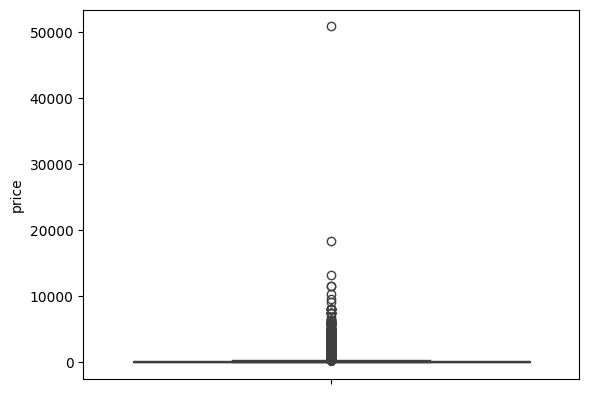

In [55]:
sns.boxplot(df['price'])
plt.show()

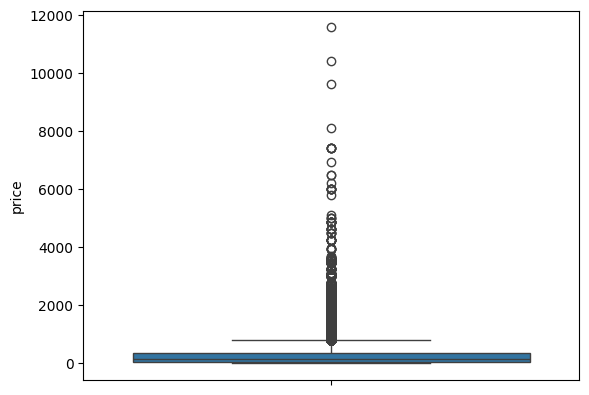

In [56]:
df1 = df.dropna().copy()
sns.boxplot(df1['price'])
plt.show()

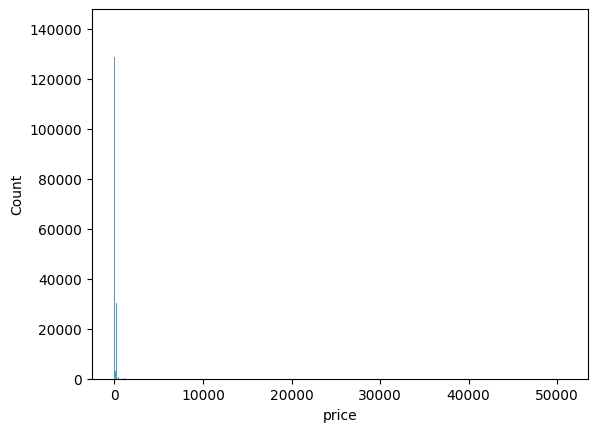

In [57]:
sns.histplot(df['price'])
plt.show()

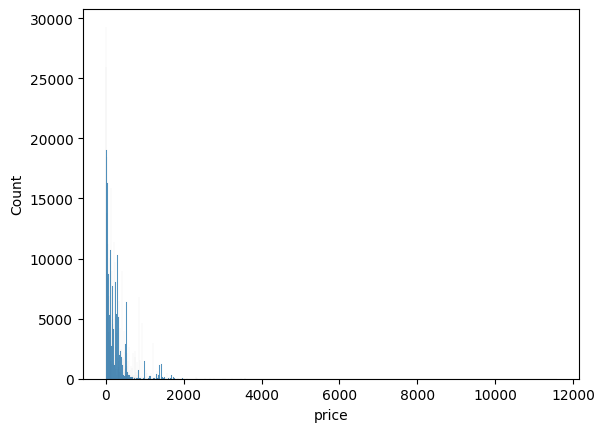

In [58]:
sns.histplot(df1['price'])
plt.show()

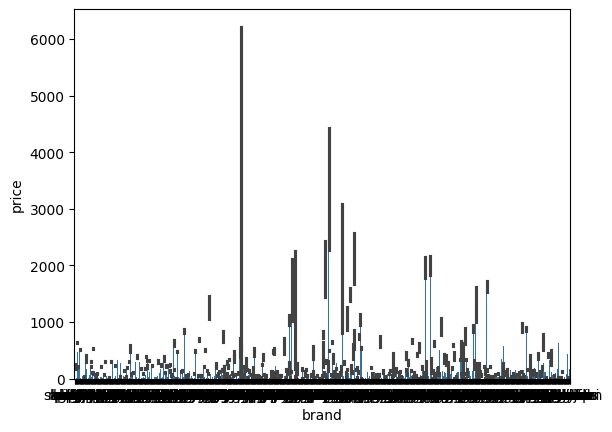

In [59]:
sns.barplot(data = df, x = 'brand', y = 'price')
plt.show()

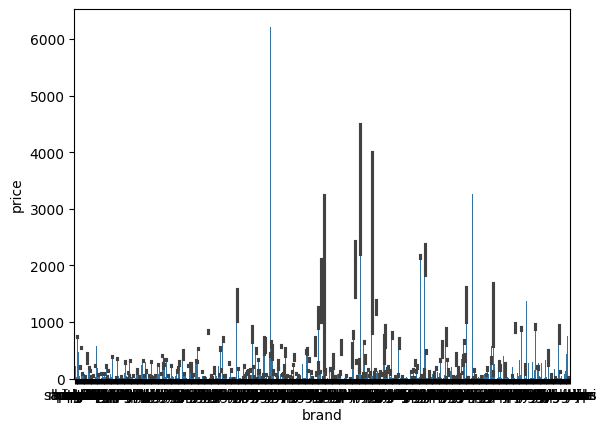

In [60]:
sns.barplot(data = df1, x = 'brand', y = 'price')
plt.show()

In [61]:
df['brand'].value_counts()

brand
samsung          358812
ava              118128
tefal             78642
apple             74684
huawei            57429
                  ...  
ubiquiti              1
kristall-auto         1
tetchair              1
luremax               1
zevs                  1
Name: count, Length: 908, dtype: int64

In [62]:
df1['brand'].value_counts()

brand
samsung        89879
apple          34877
ava            20422
lg             16329
tefal          14458
               ...  
billna             1
millet             1
harper             1
highwaybaby        1
zevs               1
Name: count, Length: 570, dtype: int64

In [63]:
df['item'].value_counts()

item
smartphone       357581
refrigerators     77371
tv                71695
notebook          71416
vacuum            66438
                  ...  
swing                 8
watering              5
snowboard             3
costume               2
shoes                 2
Name: count, Length: 121, dtype: int64

In [64]:
df1['item'].value_counts()

item
smartphone       102211
notebook          25863
refrigerators     20033
headphone         19788
tv                17646
                  ...  
diving                8
watering              5
snowboard             3
costume               2
shoes                 2
Name: count, Length: 121, dtype: int64

        From the above distributions, we can conclude that there is no such change so we can move ahead by droping the null values.
        The dataset can be reduced but we will get the better analysis, and results to be more authentic.

In [65]:
#drop the null values in datatframe and name it is a df only
df = df.dropna()

In [66]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 420218 entries, 0 to 2633520
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_time      420218 non-null  datetime64[ns]
 1   order_id        420218 non-null  int64         
 2   product_id      420218 non-null  int64         
 3   category_id     420218 non-null  float64       
 4   brand           420218 non-null  object        
 5   price           420218 non-null  float64       
 6   user_id         420218 non-null  float64       
 7   major_category  420218 non-null  object        
 8   item            420218 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 32.1+ MB


In [67]:
df = df.reset_index()

In [68]:
df = df.drop('index', axis = 1)

In [69]:
df.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet
1,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997504,huawei,78,1515915625447879424,electronics,headphone
2,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2268105442636858112,maestro,39,1515915625450382848,furniture,table
3,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387,1515915625448766464,electronics,smartphone
4,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2268105393848713984,lg,463,1515915625450561280,appliances,refrigerators


        The data set have 'event_time' which gives the info about the which date and what time the order being placed.
        Check for the years of the event_time to get to know that data set is for only one year or multiple years of data is available.

In [70]:
df['event_time'].dt.year.value_counts()

event_time
2020    419390
1970       828
Name: count, dtype: int64

        There are 828 rows of data for the year 1970 and after that there is no data set for the between years.
        1970 year data is of no use for the further analysis.
        Drop the rows of data corresponds to year 1970.

In [71]:
year_idx = df[df['event_time'].dt.year == 1970].index

df = df.drop(year_idx, axis = 0)

In [72]:
# recheck the year
df['event_time'].dt.year.value_counts()

event_time
2020    419390
Name: count, dtype: int64

        Save this df to new csv file so we can access this file without any further transformation, or data cleaning.

In [73]:
df.to_csv('../Data/nonull_ecommerse_data.csv')

In [74]:
df = pd.read_csv('../Data/nonull_ecommerse_data.csv')

In [75]:
df[df['price'] == 0]['price'].count()

4

In [76]:
df['price'].max()

11574.05

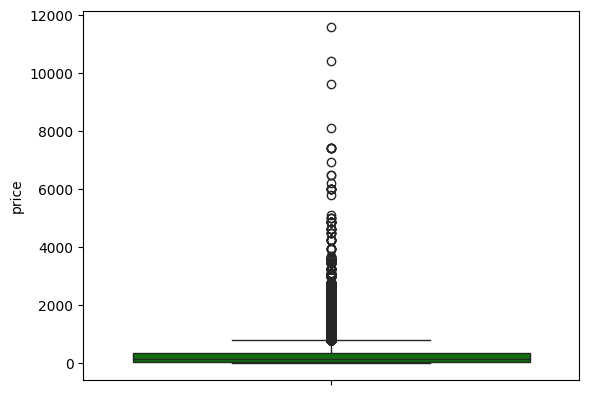

In [77]:
sns.boxplot(df['price'],color='g')
plt.show()

#### EDA problems

        Data set is bit clean now but still have plenty of null values, specially in 'user_id' column.
        If we eliminate the null values completly we will bw left with only 0.4 million rows and currently we have 2.6 million rows.
        EDA can be done on this dataset by keeping the null values in consideration.
        EDA analysis is not being that affected by null values. 

        Que: Categories the customers on the basis of there frequency of order?

In [78]:
df['user_id'].value_counts().head(10)

user_id
1515915625512422912    744
1515915625512378112    705
1515915625513695488    692
1515915625512377088    686
1515915625512118272    671
1515915625512421888    643
1515915625513445888    611
1515915625514719488    608
1515915625513446912    605
1515915625514597888    596
Name: count, dtype: int64

        Check the user_count and than categorize them on the basis of frequency of order.

In [79]:
user_cat = df.groupby(['user_id'])['order_id'].count().reset_index()

In [80]:
user_cat = user_cat.rename(columns = {'order_id':'order_count'})

In [81]:
user_cat.head()

,user_id,order_count
0,1515915625439951872,1
1,1515915625440038400,2
2,1515915625440051712,12
3,1515915625440099840,6
4,1515915625440121600,2


In [82]:
def categorize_user(x):
    if x >= 450:
        return 'Very High'
    elif x >= 250:
        return 'High'
    elif x >= 50:
        return 'Medium'
    elif x >= 5:
        return 'Medium Low'
    else:
        return 'Low'

In [83]:
user_cat['user_category'] = user_cat['order_count'].apply(categorize_user)

In [84]:
user_frequency = user_cat['user_category'].value_counts().reset_index()

In [85]:
user_frequency

,user_category,count
0,Low,69417
1,Medium Low,16666
2,Medium,640
3,High,174
4,Very High,19


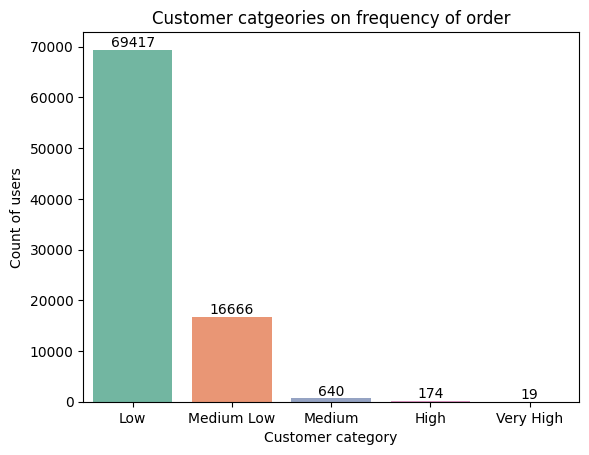

In [87]:
ax = sns.barplot(data = user_frequency, x = 'user_category', y = 'count', palette='Set2')
plt.title('Customer catgeories on frequency of order')
plt.xlabel('Customer category')
plt.ylabel('Count of users')
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

        Categorize the user on the basis of frequency of orders.
        Created diffrent categories: Very High >= 450 orders, High > 250 orderd, Medium > 50, Medium Low >= 5, Low < 5 orders.
        From the above we can inference that there are more users is in low range of order frequency (< 5). 

        Que. Find the correlation between the sales and frequency of order? Also find the top 10 users contributing max in sales?
        Use scatter plot graphically represent the reltionship between them.

In [107]:
df.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet
1,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997248,huawei,78,1515915625447879424,electronics,headphone
2,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2268105442636858112,maestro,39,1515915625450382848,furniture,table
3,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387,1515915625448766464,electronics,smartphone
4,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2268105393848713984,lg,463,1515915625450561280,appliances,refrigerators


In [89]:
total_sales = df[df['user_id'].notnull()]['price'].sum()
total_sales

106671500.12000002

In [90]:
user_sales = df.groupby('user_id')[['price', 'order_id']].agg({'price':'sum', 'order_id':'count'}).reset_index()
user_sales.sort_values(by = 'price', ascending = False).head(10)

,user_id,price,order_id
85076,1515915625513695488,145811,692
82327,1515915625512422912,144027,744
82213,1515915625512377088,136993,686
84891,1515915625513577472,123555,559
86517,1515915625514597888,122610,596
83225,1515915625512763648,111778,461
81522,1515915625512118272,109803,671
50358,1515915625484627712,105975,546
82215,1515915625512378112,103382,705
84678,1515915625513445888,101230,611


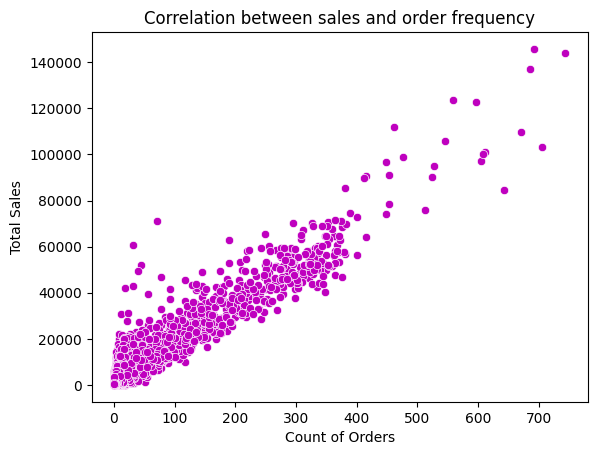

In [91]:
sns.scatterplot(data = user_sales, y = 'price', x = 'order_id', c = 'm')
plt.title('Correlation between sales and order frequency')
plt.ylabel('Total Sales')
plt.xlabel('Count of Orders')
plt.show()

        From the above graph we can say that there is a +ve correlation between 'Total Sales' and 'Frequency of order'.
        As the number of orders increased the sales are also going to increase.
        The highest sales are corresponding to the very high number of orders for the user. 

        Que: Segregate the one time and repetative customers? Find the % of users and also there contribution in sales.

In [94]:
one_time = round(user_cat[user_cat['order_count'] == 1]['order_count'].sum()*100/df['user_id'].unique().shape[0],2)
print(f"one time users => {one_time} %")

one time users => 39.95 %


In [95]:
repetative = round(user_cat[user_cat['order_count'] > 1]['user_id'].count()*100/df['user_id'].unique().shape[0],2)
print(f"repetative users => {repetative} %")

repetative users => 60.05 %


        There are total 39.95% one time user.
        There are total 60.05% of repetative users. 

In [96]:
user_sales = df.groupby('user_id')[['order_id','price']].agg({'order_id':'count', 'price':'sum'}).reset_index()

In [97]:
user_sales.head()

,user_id,order_id,price
0,1515915625439951872,1,417
1,1515915625440038400,2,56
2,1515915625440051712,12,5985
3,1515915625440099840,6,3647
4,1515915625440121600,2,183


In [98]:
one_time_user_sales = user_sales[user_sales['order_id'] == 1]['price'].sum()

In [99]:
repetative_user_sales = user_sales[user_sales['order_id'] > 1]['price'].sum()

In [100]:
one_time_user_contribution = one_time_user_sales*100/(df['price'].sum())
repetative_user_contribution = repetative_user_sales*100/(df['price'].sum())

In [101]:
print(f"one_time_user_sales => {round(one_time_user_contribution,2)} %")
print(f"repetative_user_sales => {round(repetative_user_contribution,2)} %")

one_time_user_sales => 9.84 %
repetative_user_sales => 90.16 %


        The one time user contributed to 9.84% of total sales and while most sales made by the repetative sales equal to 90.16%.
        Which indicate that E-Commerce providing a better product and better service leading to let back the customer.
        Customer is prefering the same E-Commerce to place their orders.
        Definitely their is a challege with handling the new users can be accounted by putting some new enthrilling marketing strategy. 

        Que: How many number of transactions made monthly basis?

In [108]:
df['month_name'] = df['event_time'].dt.month_name()
df['month_name'].head()

0    April
1    April
2    April
3    April
4    April
Name: month_name, dtype: object

In [109]:
monthly_trans = df.groupby('month_name')['order_id'].count().reset_index()

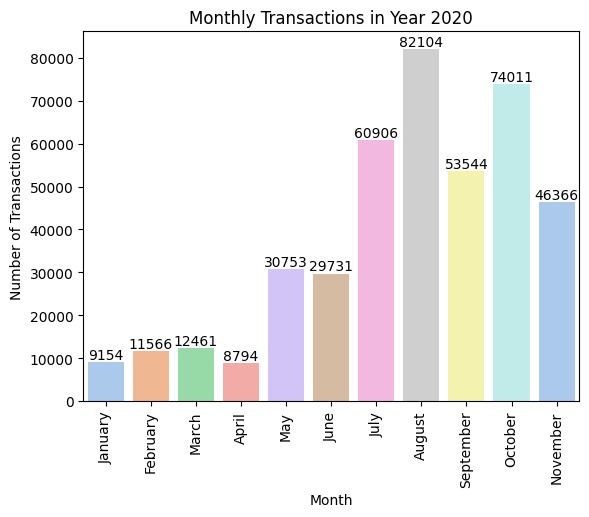

In [110]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

ax = sns.barplot(data = monthly_trans, x = 'month_name', y = 'order_id', order = month, palette = 'pastel')
plt.title('Monthly Transactions in Year 2020')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

        The above graph inferes the details about the number of transaction made in each month of the year 2020.
        Throughout the year number of transaction increasae till Month of August and then started to decrease till year end.
        August month have 82K transactions the highest, followed by October, July and September.
        April have the least number of transactions followed by January and February.
        We don't have a country or region related info so can't clearly comment why the speific months have high orders. 

        Que. Calculate the sales of each month?

In [111]:
df.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item,month_name
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet,April
1,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997248,huawei,78,1515915625447879424,electronics,headphone,April
2,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2268105442636858112,maestro,39,1515915625450382848,furniture,table,April
3,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387,1515915625448766464,electronics,smartphone,April
4,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2268105393848713984,lg,463,1515915625450561280,appliances,refrigerators,April


In [112]:
monthly_sales = df.groupby('month_name')['price'].sum().reset_index()

In [113]:
monthly_sales['price'] = monthly_sales['price']/100000

In [114]:
monthly_sales['price'] = monthly_sales['price'].astype('int64')

In [115]:
monthly_sales.head()

,month_name,price
0,April,15
1,August,260
2,February,19
3,January,15
4,July,150


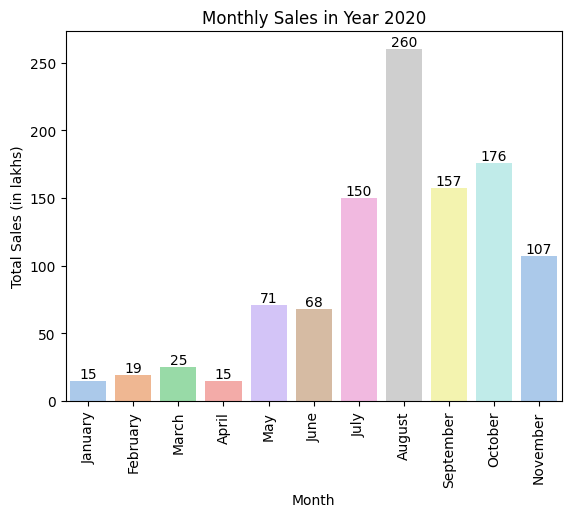

In [116]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

ax = sns.barplot(data = monthly_sales, x = 'month_name', y = 'price', order = month, palette = 'pastel')
plt.title('Monthly Sales in Year 2020')
plt.xlabel('Month')
plt.ylabel('Total Sales (in lakhs)')
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

        The above graph inferes the sales each month in year 2020 in lakhs (10^5).
        Throughout the year upto month August sales are increasing and then it decrease till the year end.
        August month have the highest frequency of orders and sales, followed by october and july.
        Least number of sales in the month of april followed by january and february.

        Que. How many number of transaction made daily in a year.

In [117]:
df['days'] = df['event_time'].dt.day_name()

In [118]:
days_trans = df.groupby('days')['order_id'].count().reset_index()

In [119]:
days_trans = days_trans.sort_values(by = 'order_id', ascending = False)

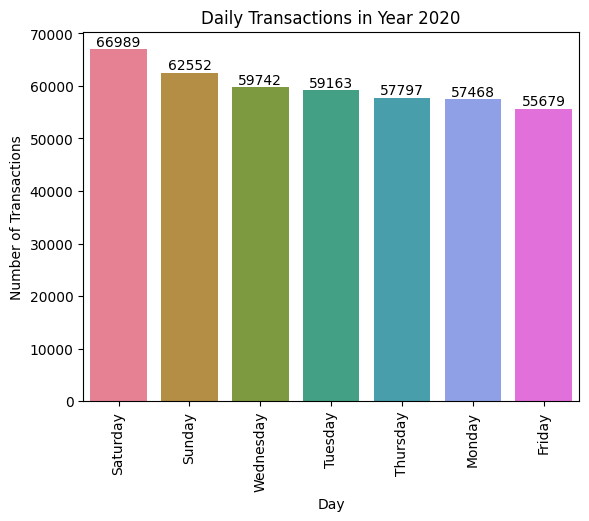

In [120]:
ax = sns.barplot(data = days_trans, x = 'days', y = 'order_id', palette = 'husl')
plt.title('Daily Transactions in Year 2020')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

        The above graphe infers the number of transactions made in a daily basis in a year 2020.
        The highest number of order placed on 'Saturday' and followed by 'Sunday'.
        Least number of orders placed on the day 'Friday'. 

        Que. Calculate the daily sales in the year 2020?

In [121]:
daily_sales = df.groupby('days')['price'].sum().reset_index()

In [122]:
daily_sales['price'] = daily_sales['price']/100000

In [123]:
daily_sales['price'] = daily_sales['price'].astype(int)

In [124]:
daily_sales = daily_sales.sort_values(by = 'price', ascending = False)
daily_sales.head()

,days,price
2,Saturday,169
3,Sunday,159
1,Monday,151
5,Tuesday,149
6,Wednesday,147


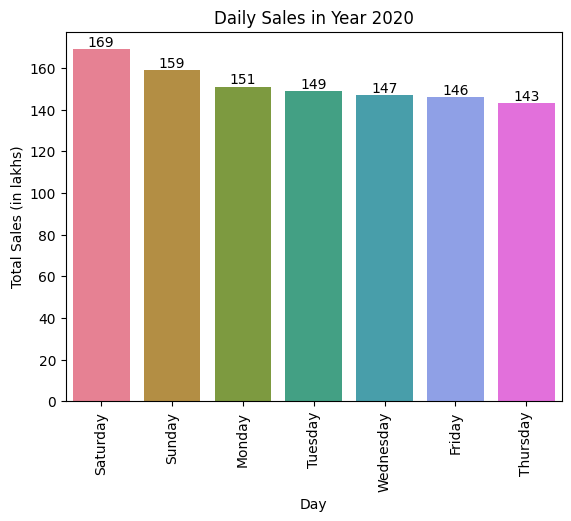

In [125]:
ax = sns.barplot(data = daily_sales, x = 'days', y = 'price', palette = 'husl')
plt.title('Daily Sales in Year 2020')
plt.xlabel('Day')
plt.ylabel('Total Sales (in lakhs)')
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

        The above graph inferes the daily sales for the year 2020.
        Highest sales made on the day of weekends saturday and sunday.
        Least sales made on the day Thursday.

        Que. Calculate the number of orders per hour? 

In [126]:
df['hour'] = df['event_time'].dt.hour

In [127]:
hourly_trans = df.groupby('hour')['order_id'].count().reset_index()

In [128]:
hourly_trans.head()

,hour,order_id
0,0,2689
1,1,3530
2,2,5603
3,3,10384
4,4,20045


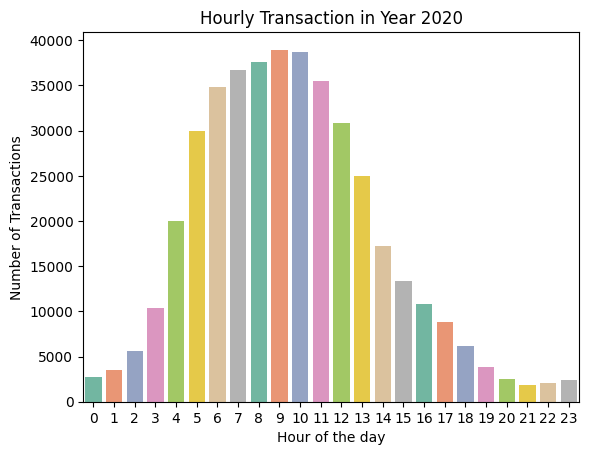

In [129]:
sns.barplot(data = hourly_trans, x = 'hour', y = 'order_id', palette = 'Set2')

plt.title('Hourly Transaction in Year 2020')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Transactions')

plt.show()

        The above graph infers the number of transaction made in the hour of day of the year 2020.
        Maximum number of transaction or order placed in morning 10 to 11 both inclusive. 
        Least number of orders placed between in night 9 to 10 both inclusive.

        Que. Calculate the total hourly sales in year 2020?

In [130]:
hourly_sales = df.groupby('hour')['price'].sum().reset_index()

In [131]:
hourly_sales['price'] = hourly_sales['price']/100000 

In [132]:
hourly_sales['price'] = hourly_sales['price'].astype('int')
hourly_sales.head()

,hour,price
0,0,8
1,1,10
2,2,17
3,3,30
4,4,49


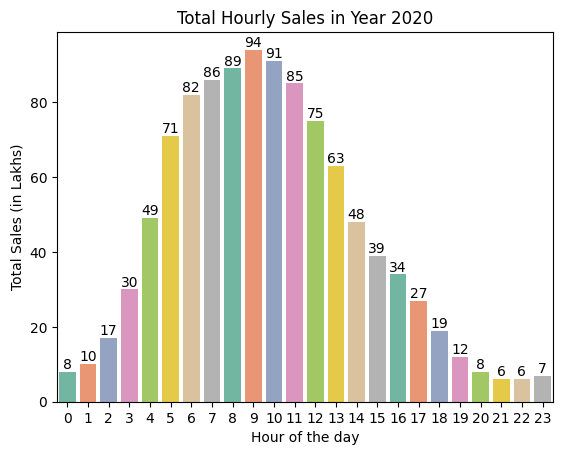

In [134]:
ax = sns.barplot(data = hourly_sales, x = 'hour', y = 'price', palette = 'Set2')

plt.title('Total Hourly Sales in Year 2020')
plt.xlabel('Hour of the day')
plt.ylabel('Total Sales (in Lakhs)')
#plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

        The graph infers the total hourly sales in a day of year 2020.
        The maximum sales occurs in morning in between 9 to 10 both inclusive.
        Least sales is in night between 9 to 10 both inclusive.

        Que. Calculate the mean time taken by user in pacing an orders?

In [135]:
min_eventtime = df.groupby('user_id')[['event_time','order_id']].agg({'event_time':'min', 'order_id':'count'}).reset_index()

In [136]:
max_eventtime = df.groupby('user_id')['event_time'].max().reset_index()

In [137]:
max_eventtime.head()

,user_id,event_time
0,1515915625439951872,2020-07-09 06:35:18
1,1515915625440038400,2020-10-28 05:53:47
2,1515915625440051712,2020-11-16 15:49:50
3,1515915625440099840,2020-10-06 05:59:30
4,1515915625440121600,2020-07-14 13:04:12


In [138]:
merge_eventtime = pd.merge(min_eventtime, max_eventtime, on = 'user_id', suffixes = ('_min', '_max'))

In [139]:
merge_eventtime.head()

,user_id,event_time_min,order_id,event_time_max
0,1515915625439951872,2020-07-09 06:35:18,1,2020-07-09 06:35:18
1,1515915625440038400,2020-09-22 15:11:15,2,2020-10-28 05:53:47
2,1515915625440051712,2020-10-23 03:51:26,12,2020-11-16 15:49:50
3,1515915625440099840,2020-06-10 21:37:30,6,2020-10-06 05:59:30
4,1515915625440121600,2020-05-16 16:09:13,2,2020-07-14 13:04:12


In [140]:
merge_eventtime['time_diff'] = (merge_eventtime['event_time_max'] - merge_eventtime['event_time_min'])

In [141]:
merge_eventtime['time_diff'] = merge_eventtime['time_diff'].dt.total_seconds()/3600

In [142]:
merge_eventtime['avg_time_diff'] = merge_eventtime['time_diff']/merge_eventtime['order_id']

In [143]:
merge_eventtime.sort_values(by = 'order_id', ascending = False).head(10)

,user_id,event_time_min,order_id,event_time_max,time_diff,avg_time_diff
82327,1515915625512422912,2020-10-11 03:50:37,744,2020-11-19 14:33:32,947,1
82215,1515915625512378112,2020-10-10 04:05:26,705,2020-11-19 14:03:27,970,1
85076,1515915625513695488,2020-11-01 04:29:11,692,2020-11-19 13:20:35,441,1
82213,1515915625512377088,2020-10-10 03:19:13,686,2020-11-18 11:09:15,944,1
81522,1515915625512118272,2020-10-04 04:15:25,671,2020-11-19 13:35:59,1113,2
82325,1515915625512421888,2020-09-27 06:49:18,643,2020-11-19 12:52:52,1278,2
84678,1515915625513445888,2020-10-28 04:02:31,611,2020-11-19 14:10:29,538,1
86707,1515915625514719488,2020-11-18 03:18:10,608,2020-11-19 08:59:42,30,0
84680,1515915625513446912,2020-10-28 04:03:50,605,2020-11-19 12:36:34,537,1
86517,1515915625514597888,2020-11-14 04:09:34,596,2020-11-19 10:32:16,126,0


<Axes: xlabel='order_id', ylabel='avg_time_diff'>

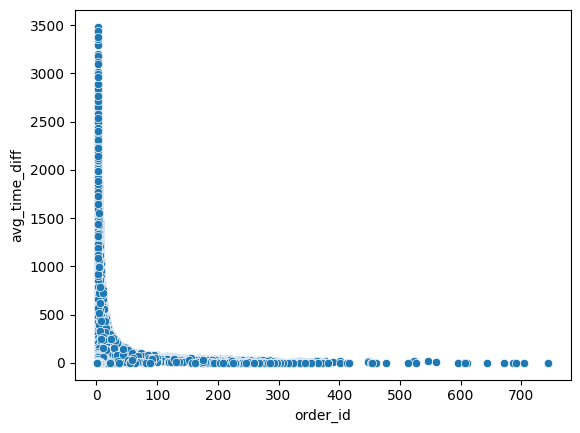

In [145]:
sns.scatterplot(data = merge_eventtime, x = 'order_id', y = 'avg_time_diff')

        From the above analysis we get to know that the average time between two orders is 1hr for the users who are placing the 
        maximum orders. For the calculation of average time between orders we have calculated its total spent betwen all the orders and 
        devide by the total number of order placed. 
        There are all the users who have placed an order >= 1. 

        Que. Which brand of product makes the most transaction and sales?

In [147]:
brand_order_sale = df.groupby('brand')[['order_id','price']].agg({'order_id':'count', 'price':'sum'}).reset_index()

In [148]:
top_ten_brand = brand_order_sale.sort_values(by = 'price', ascending = False).head(10)

In [149]:
top_ten_brand['price'] = top_ten_brand['price']/100000

In [150]:
top_ten_brand.rename(columns = {'order_id':'count_of_order'}, inplace = True)

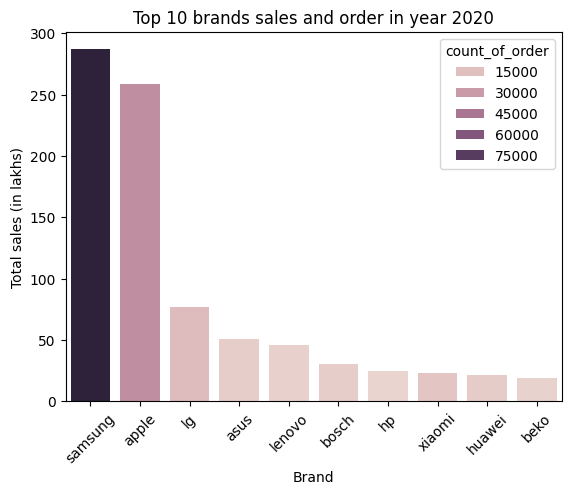

In [151]:
sns.barplot(data = top_ten_brand, x = 'brand', y = 'price', hue = 'count_of_order')

plt.title('Top 10 brands sales and order in year 2020')
plt.xlabel('Brand')
plt.ylabel('Total sales (in lakhs)')
plt.xticks(rotation = 45)

plt.show()

        The above graph infers the details between the most successful brands and there sales and orders.
        The 'samsung' have the highest orders and sales among the other brands and followed by 'apple'.
        'Samsung' is most trusted and reliable brand among the people that's why it's order and sales are very high.

In [152]:
brand_order_sale.sort_values(by = 'price').head(10)

,brand,order_id,price
390,pedigree,1,0
102,celebrat,1,0
547,wurth,1,1
163,elfe,2,1
47,att,4,1
40,artberry,1,1
334,milan,1,1
382,palisad,1,2
469,stabilo,1,2
424,reno,2,2


        List of brands which are least ordered and have a lowest price among the other products.
        Some prouducts have zero price, there is no such data available to claim on it why there price is zero, & still it zero 
        order placed by user.

        Que. Which category have the highest transaction and sales? Which item is prefered within that category?

In [153]:
item_sales = df.groupby(['major_category','item'])[['order_id', 'price']].agg({'order_id':'count', 'price':'sum'}).reset_index() 

In [154]:
top_ten_items = item_sales.sort_values(by = 'price', ascending = False).head(10)

In [155]:
top_ten_items['price'] = top_ten_items['price']/100000

In [156]:
top_ten_items.rename(columns = {'order_id':'count_of_orders'}, inplace = True)

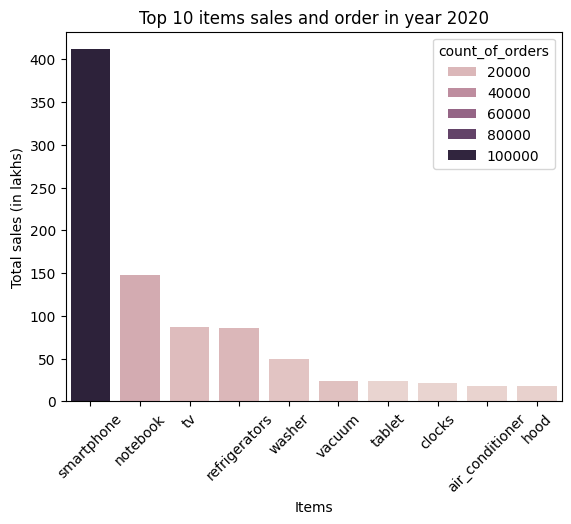

In [157]:
sns.barplot(data = top_ten_items, x = 'item', y = 'price', hue = 'count_of_orders')

plt.title('Top 10 items sales and order in year 2020')
plt.xlabel('Items')
plt.ylabel('Total sales (in lakhs)')
plt.xticks(rotation = 45)

plt.show()

        The above graph inferes the top 10 items popular among the users and their sales and orders.
        Smartphone is mostly ordered by the users, followed by the notebook (computer), and tv.

In [158]:
item_sales.sort_values(by = 'price').head(10)

,major_category,item,order_id,price
77,country_yard,watering,5,29
2,apparel,costume,2,43
113,sport,diving,8,110
106,kids,diapers,11,204
70,construction,light,10,238
80,electronics,calculator,28,367
5,apparel,shoes,2,412
64,computers,sound_card,26,616
82,electronics,dictaphone,12,675
114,sport,ski,11,721


        Que. Different categories of products, brands and items availabel. For getting the better undesratnding of products, 
        do a analysis to understand the availability of products on E-Commerce, which helps in understanding the products. 

In [159]:
table = pd.pivot_table(df,
                index = ['major_category'],
                values = ['brand','item','price'],   
                aggfunc = {'brand':pd.Series.nunique, 'item':pd.Series.nunique, 'price':'sum'},
                margins = True,
                margins_name = 'Grand Total'
)

In [160]:
table.columns = ['num_brands','num_items', 'total_sales']

In [161]:
table['sales_percentage'] = (table['total_sales'])*10000/(table.loc['Grand Total', 'total_sales'])

In [162]:
table1 = table.drop(index = 'Grand Total')
table2 = table1.sort_values(by = 'total_sales', ascending = False)
table = pd.concat([table2, table.loc[['Grand Total']]])

In [163]:
print(table,"\n",table2)

                num_brands  num_items  total_sales  sales_percentage
major_category                                                      
electronics            129         14     56713685              5317
appliances             140         30     27437260              2572
computers              151         21     19242876              1804
furniture              110         11      1022587                96
apparel                 23          7       787574                74
kids                    51          7       549691                52
construction            44          9       331911                31
sport                   43          6       243894                23
auto                    31          6       119889                11
medicine                 6          1        70498                 7
accessories             41          2        63081                 6
stationery              30          4        62383                 6
country_yard             8        

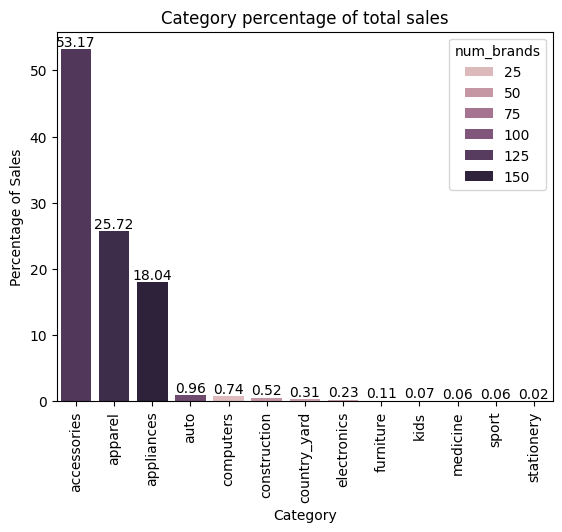

In [164]:
ax = sns.barplot(data = table2, x = table1.index, y = round(table2['sales_percentage']/100,2), hue = 'num_brands')

plt.title("Category percentage of total sales")
plt.xlabel('Category')
plt.ylabel('Percentage of Sales')
plt.xticks(rotation = 90)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

        The above table helps in understanding the different products available at E-Commerce company.
        A wide variety of products avilable and have 570 brands of products and 121 item types available.
        More variety or brands and items gives a range of products available which will helps in getting more customers.
        'electronics', appliamces, and 'computers' combined together made a 97% of total sales. 
        Category 'electronics' have the highest contribution of 53.17% of total sales, followed by appliances 25.72%, and 
        computers 18.04%.
        Least contribution made by country_yard contributing only 0.02% of total sales, followed by stationary 0.06%, and 
        accessories 0.06%.       

        Que. How many new customers added each month? (Assumption: consider the one time users be the new customers)

In [165]:
monthly_users = df.groupby(['user_id','month_name'])['order_id'].count().reset_index()

In [166]:
monthly_new_users = monthly_users[monthly_users['order_id'] == 1].groupby('month_name')['order_id'].sum().reset_index()

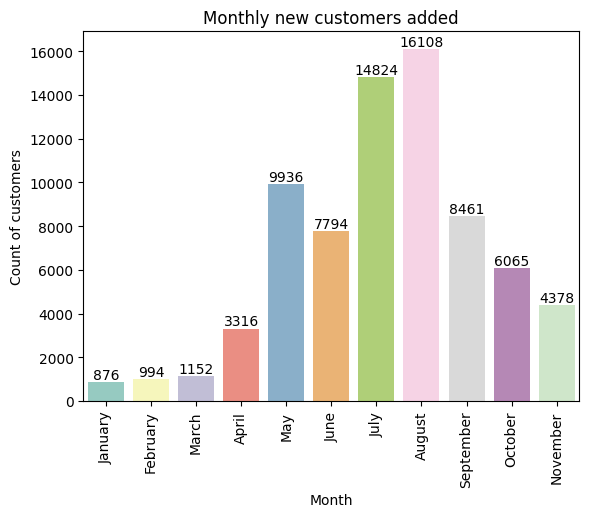

In [167]:
months = ['January','February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November']
ax = sns.barplot(data = monthly_new_users, x = 'month_name', y = 'order_id', order = months, palette = 'Set3')

plt.title('Monthly new customers added')
plt.xlabel('Month')
plt.ylabel('Count of customers')
plt.xticks(rotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

        The above graphe the monthly new customer added or used the E-Commerce for the ordering. 
        Assuption for considering the new customer: User who put the only one order. There is no other data provided this seems a 
        good assupmtion.
        Through the year in first quarter the new customers increases and start of 2nd quarter there was a fall and then suddenly
        number reach to maximum. In the 3rd and last quarter the number of users are decreasing continously. 

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419390 entries, 0 to 419389
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_time      419390 non-null  datetime64[ns]
 1   order_id        419390 non-null  int64         
 2   product_id      419390 non-null  int64         
 3   category_id     419390 non-null  float64       
 4   brand           419390 non-null  object        
 5   price           419390 non-null  float64       
 6   user_id         419390 non-null  float64       
 7   major_category  419390 non-null  object        
 8   item            419390 non-null  object        
 9   month_name      419390 non-null  object        
 10  days            419390 non-null  object        
 11  hour            419390 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(5)
memory usage: 36.8+ MB


In [169]:
df.describe()

,event_time,order_id,product_id,category_id,price,user_id,hour
count,419390,419390,419390,419390,419390,419390,419390
mean,2020-08-08 03:47:13.900629760,2370519149028141056,1676749844098582528,2274300488026344960,254,1515915625486006528,10
min,2020-01-05 04:06:18,2294359932054536960,1515966223509088512,2268105388421284352,0,1515915625439951872,0
25%,2020-07-03 09:37:42.750000128,2354505018129776640,1515966223509104128,2268105406356128768,39,1515915625466680064,6
50%,2020-08-14 09:12:12.500000,2375496486034080768,1515966223509258240,2268105428166509056,139,1515915625486703616,9
75%,2020-10-06 14:17:08.500000,2388440981134590976,1515966223522710784,2268105430162997248,347,1515915625511230208,12
max,2020-11-21 10:10:30,2388440981134693888,2388434452476865536,2374498914001945600,11574,1515915625514891264,23
std,NaN,20127613743098988,317123444542389248,24386455462291616,321,23709675,4


In [170]:
corr = df.corr(numeric_only=True)
corr    

,order_id,product_id,category_id,price,user_id,hour
order_id,1,0,-0,0,1,-0
product_id,0,1,-0,-0,0,-0
category_id,-0,-0,1,0,-0,-0
price,0,-0,0,1,-0,0
user_id,1,0,-0,-0,1,-0
hour,-0,-0,-0,0,-0,1


<Axes: >

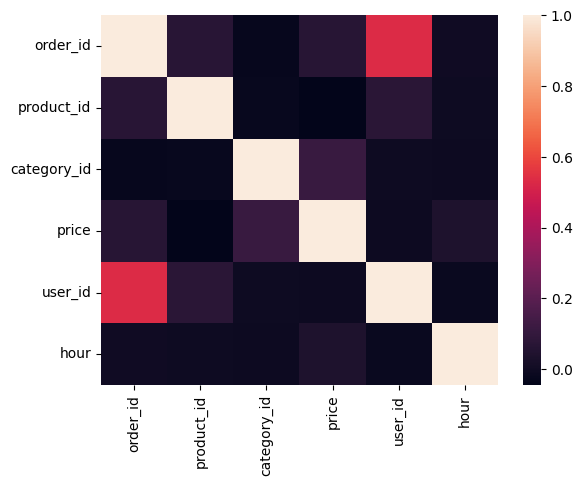

In [171]:
sns.heatmap(corr)

### Modeling of data set 

        After doing the exploratory data analysis over a data set we get to knoe about the top prioriity users, products and categories.
        WHich tells the characteristics and gives a insights about the data set. 
        After doing theh preliminary analsysi we are going to move ahead with implementing the machine learning models. For improving the 
        customer loayalty and increase the sales, the potential approch could be:

        Customer Segmentation: Segmentation of customer based on their purchase history, and prefernce for the products. 
        This can help us in tailor the marketing startegies and promotions to different customers, thereby improve the customer 
        loyalty and sales too.

        For categoriesing the customer in different segmentation and clusting will help us.
        We will use the K-mean model to do the segmenttation and enhance our customer interaction.
        KMeans :-
        Kmean is one of the simple and efficient clustering algorithm that can group the customer inot distinct clsuters based on
        the similarity. This will help us in identifying the different segments with purchasing behaviour. 
        Kmeans can be used for doing the clustering of the customers to segregate them and put it into specific groups.
        Though we don't have any earlier groups, and no output data or Y variable (independent) so can be considered as unsupervised 
        learning. For better customer loyalty we can group them into groups to priortise the customer and can service them in a better 
        way.  

In [172]:
df.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item,month_name,days,hour
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet,April,Friday,11
1,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997248,huawei,78,1515915625447879424,electronics,headphone,April,Friday,14
2,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2268105442636858112,maestro,39,1515915625450382848,furniture,table,April,Sunday,8
3,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387,1515915625448766464,electronics,smartphone,April,Sunday,9
4,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2268105393848713984,lg,463,1515915625450561280,appliances,refrigerators,April,Sunday,14


        Step 1. Drop the unnecessary columns 
        'event_time': It is giving the complete information at what time and on which date the order being palced. But the dataitype for 
        it is date-time which will not be easy for the model to read. For the easy modeling we will extract the month, and year.
        'order_id': It is unique for the every order and does not give any specific relation with the other data set so drop it.
        'category_id': catgory id is also unique for the each categories but while doing the modeling it is not require so we drop it.
        'brand', 'major_category' and 'item' all three are categorical dataset and machine will only undesratnd the numerical data 
        so for the modeling we will drop these columns.
        'month_name' and 'days' are also categorical data we will drop them and extarct the months with there numerical values.
        'hour', will give us the information of users on hourly basis. So while analysisng the data on monthly and daily basis we can 
        drop the hour column to minimise the variable for the modeling.
         

In [139]:
df1 = df.drop(['event_time','order_id','category_id','brand','major_category','item','month_name','days','hour'], axis = 1)

In [143]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419390 entries, 0 to 419389
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   product_id  419390 non-null  int64  
 1   price       419390 non-null  float64
 2   user_id     419390 non-null  float64
 3   year        419390 non-null  int32  
 4   month       419390 non-null  int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 12.8 MB


In [141]:
df1['year'] = df['event_time'].dt.year

In [142]:
df1['month'] = df['event_time'].dt.month

In [157]:
# applying goupby to get information on the basis of sales made by user per year, per month, each user.
df2 = df1.groupby(['user_id','product_id','year','month'])['price'].sum().reset_index()

In [160]:
df2.head()

,user_id,product_id,year,month,price
0,1515915625439951872,1515966223509089779,2020,7,417
1,1515915625440038400,1515966223520144221,2020,10,35
2,1515915625440038400,2273948227747185446,2020,9,21
3,1515915625440051712,1515966223509104210,2020,10,116
4,1515915625440051712,1515966223522710798,2020,11,139


        Import the model 

In [161]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

        Activate the model

In [167]:
kmeans = KMeans()
scaler = StandardScaler()

        Fit the dataset

In [166]:
df_fit = scaler.fit_transform(df2)

        Use the elbow method for predicting the number of clusters

In [170]:
inertia = []
for i in range(1,6):      # we have 5 column so range set to be 1 to 6
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_fit)
    inertia.append(kmeans.inertia_)

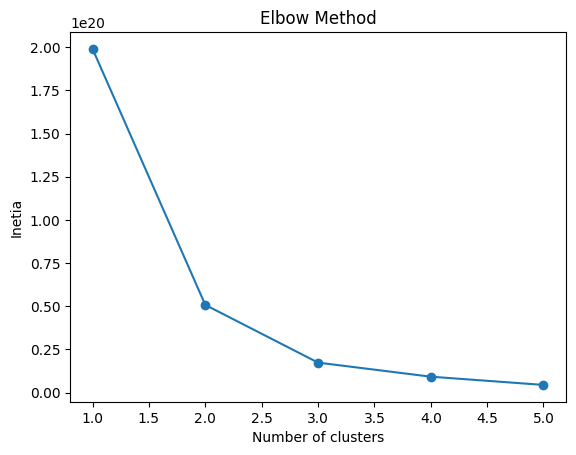

In [172]:
plt.plot(range(1,6), inertia, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inetia')
plt.show()

        The above curve is called as the Elbow curve or Elbow method.
        The above method we can use the k = 3 (no. of clusters) to categories the customers in three different cluters.

        Consider k = 3 and start predicting the values from the model for clustering. 

In [173]:
# using k = 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_fit)

KMeans(n_clusters=3)

        Storing the values of cluster in different column to the data frame 

In [174]:
df2['cluster'] = kmeans.labels_

In [180]:
df2[df2['cluster'] == 0].sort_values(by = 'price', ascending = False).head(10)

,user_id,product_id,year,month,price,cluster
272940,1515915625511371008,1515966223509088545,2020,9,25083,0
332062,1515915625513809920,1515966223520801268,2020,11,24305,0
330856,1515915625513722624,1515966223511491826,2020,8,21898,0
314270,1515915625512895488,2273948224005865793,2020,11,19558,0
310025,1515915625512763648,2388434452475833969,2020,11,19165,0
267512,1515915625510965504,1515966223545249827,2020,9,17824,0
288364,1515915625512135168,2388434452475913588,2020,10,14699,0
275876,1515915625511584000,1515966223509089303,2020,9,14566,0
275887,1515915625511584000,1515966223509105893,2020,9,14555,0
272941,1515915625511371008,1515966223509088545,2020,10,14333,0


In [177]:
df2[df2['cluster'] == 1].head(10)

,user_id,product_id,year,month,price,cluster
0,1515915625439951872,1515966223509089779,2020,7,417,1
1,1515915625440038400,1515966223520144221,2020,10,35,1
2,1515915625440038400,2273948227747185446,2020,9,21,1
3,1515915625440051712,1515966223509104210,2020,10,116,1
4,1515915625440051712,1515966223522710798,2020,11,139,1
5,1515915625440051712,2273948310777627555,2020,11,336,1
6,1515915625440051712,2335421146742129424,2020,10,856,1
7,1515915625440051712,2388434452474083105,2020,11,31,1
8,1515915625440051712,2388434452474147979,2020,11,30,1
9,1515915625440051712,2388434452475528535,2020,11,29,1


In [178]:
df2[df2['cluster'] == 2].head(10)

,user_id,product_id,year,month,price,cluster
99444,1515915625470303488,1515966223509089708,2020,7,9,2
99445,1515915625470303488,1515966223539928535,2020,10,162,2
99446,1515915625470305536,1515966223509089056,2020,6,115,2
99447,1515915625470305536,1515966223509089400,2020,6,81,2
99448,1515915625470306560,1515966223509127512,2020,6,8,2
99449,1515915625470306560,1515966223516338090,2020,7,845,2
99450,1515915625470306816,1515966223509105052,2020,9,139,2
99451,1515915625470306816,1515966223509122654,2020,9,139,2
99452,1515915625470307328,1515966223509088671,2020,7,926,2
99453,1515915625470308352,1515966223509123290,2020,8,562,2


        From the cluster column we can see the grouping of the users on the basis of there purchase pattern considerin the year,
        month, product_id, and price. We have apply the aggregate over price to see if any user put multiple order in same month to
        be considered as one. 
        Some what model has performed well. For the first cluster it consider the month of august, september, & october (considering 
        the month with high sales) and for the cluster 1 and 2 it considered the mixed months.
        So to improve this model working we can add new column with count of orders and then group by with user_id and month.
        The data set we get have only year 2020, only one year data. Also the product_ids we can drop because to improwise the sales,
        we need to focus mainly on the orders placed and total sales corresponding to it by the user in a month, to get the overview of
        the year.  

In [182]:
df.columns

Index(['event_time', 'order_id', 'product_id', 'category_id', 'brand', 'price',
       'user_id', 'major_category', 'item', 'month_name', 'days', 'hour'],
      dtype='object')

In [184]:
df1 = df.drop(['event_time', 'product_id', 'category_id', 'brand', 'major_category', 'item', 'month_name', 'days', 'hour'], axis = 1)

In [185]:
df1['month'] = df['event_time'].dt.month

In [188]:
df2 = df1.groupby(['user_id','month'])[['order_id','price']].agg({'order_id':'count','price':'sum'}).reset_index()

        In previous modeling step we have already import and activate the model.

        Transform the data or the training of the model.

In [190]:
df2_fit = scaler.fit_transform(df2)

        Finding the number of clusters or k value, using the Elbow method. 

In [192]:
inertia = []
for i in range(1,5):             # there are only 4 columns in the data set
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_fit)
    inertia.append(kmeans.inertia_)

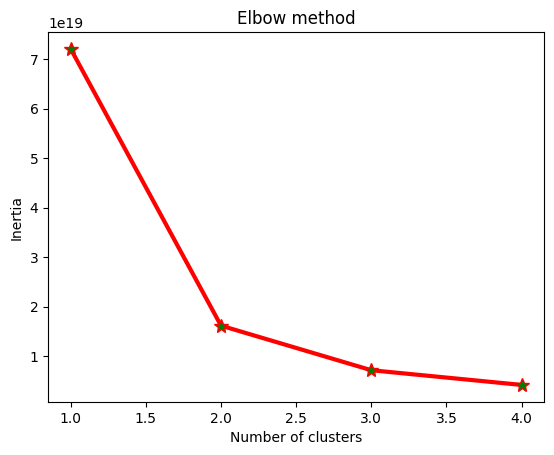

In [201]:
plt.plot(range(1,5),inertia, marker = '*', c = 'r', linewidth = 3, markersize = 10, markerfacecolor = 'g')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

        From the Elbow method we can say k = 3 (number of clusters).

In [202]:
# k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2_fit)

KMeans(n_clusters=3)

In [203]:
df2['cluster'] = kmeans.labels_

In [205]:
df2[df2['cluster'] == 0].sort_values(by='price', ascending = False).head(10)

,user_id,month,order_id,price,cluster
44730,1515915625460303872,6,30,27696,0
26774,1515915625450813696,9,26,21892,0
1971,1515915625441217280,6,32,18746,0
45934,1515915625460906496,8,7,17911,0
29226,1515915625452023296,8,77,16583,0
9750,1515915625443031040,5,16,15282,0
11095,1515915625443475200,7,18,15108,0
4289,1515915625441621248,9,12,14555,0
40475,1515915625458052864,8,5,14421,0
44731,1515915625460303872,7,9,14398,0


In [206]:
df2[df2['cluster'] == 1].sort_values(by='price', ascending = False).head(10)

,user_id,month,order_id,price,cluster
132912,1515915625513695488,11,692,145811,1
129255,1515915625512422912,10,681,135904,1
129111,1515915625512377088,10,641,127675,1
134648,1515915625514597888,11,596,122610,1
132699,1515915625513577472,10,503,116085,1
128224,1515915625512118272,10,638,103535,1
134866,1515915625514719488,11,608,100226,1
129115,1515915625512378112,10,661,99575,1
133894,1515915625514160128,11,477,98892,1
132425,1515915625513445888,10,555,96910,1


In [207]:
df2[df2['cluster'] == 2].sort_values(by='price', ascending = False).head(10)

,user_id,month,order_id,price,cluster
84332,1515915625484668928,3,155,43906,2
84246,1515915625484666112,3,178,42970,2
82591,1515915625484617728,1,194,38407,2
82458,1515915625484582912,1,236,37420,2
84614,1515915625484677888,3,203,37033,2
82979,1515915625484627712,1,202,33822,2
83644,1515915625484646912,2,183,31877,2
84526,1515915625484675072,3,112,31454,2
83742,1515915625484649472,2,221,30542,2
84281,1515915625484667136,3,120,30054,2


        Now from the output we can say the the cluster worked better then earlier, and egmenting the customer better.
        The cluster 1 have the users which are placing the highest orders in month of august and october.
        The cluster 2 have users which are placing the medium range of orders, and the cluster 0 have users with least
        sales. 
        From the above clusters we can reach out to our customers in a better way and do the marketing and implement the 
        proper marketing strategies to improve customer loyalty and increase the sales.
        The cluster with the least order have the maximum potential to improvise, take the proper feedback of that users.
        Improvise the techniques and efficiently implement to get the high revenue with increasing number of users.
         

        After doing the segmentation of customers we can move ahead with calculating the sales over the year.
        We have a data set for the year 2020 only, for this year we will implement the model and try to find the linear
        solution to improve in the months to maximise the sales.
        We will use Linear Regression Model for predicting the sales. 

#### Linear Regression Model

        LiR name itself indicates the simple and supervised learning model. Which mean we will have the input variables (X - features)
        and dependent variable (Y - predicting).
        In LiR model the equation being written to predict the y values by using the using the features values. 
        LiR model predicts best fit line which will take all the input values and assign the weights to diffrent features and predict 
        the value.
        LiR model can only take the numerical values which means we will kept only those column which have numerical data and 
        useful for the analysis. 

In [208]:
df.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,major_category,item,month_name,days,hour
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2268105426648171008,samsung,162,1515915625441993984,electronics,tablet,April,Friday,11
1,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2268105430162997248,huawei,78,1515915625447879424,electronics,headphone,April,Friday,14
2,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2268105442636858112,maestro,39,1515915625450382848,furniture,table,April,Sunday,8
3,2020-04-26 09:33:47,2295740594749702229,1515966223509104892,2268105428166509056,apple,1387,1515915625448766464,electronics,smartphone,April,Sunday,9
4,2020-04-26 14:55:26,2295902490203259134,2273948311742316796,2268105393848713984,lg,463,1515915625450561280,appliances,refrigerators,April,Sunday,14


        Droping the categorical columns

In [228]:
df3 = df.drop(['event_time','product_id','category_id','brand','major_category','item','month_name','days','hour'], axis = 1).reset_index()

        Adding the numerical column so we can perform the Monthly sales analysis over data set for the year 2020.

In [230]:
df3['month'] = df['event_time'].dt.month

In [232]:
df3 = df3.drop('index',axis = 1)

        Calculating the sales for each user over the month

In [233]:
df4 = df3.groupby(['user_id','month'])[['order_id','price']].agg({'order_id':'count','price':'sum'}).reset_index()

In [235]:
df4 = df4.drop('user_id', axis = 1)

In [246]:
df4.head()

,month,order_id,price
135078,11,1,208
135079,11,1,3472
135080,11,2,278
135081,11,1,926
135082,11,1,419


        Import the models and activate the model

In [252]:
from sklearn.linear_model import LinearRegression
lir = LinearRegression()

        Defining the independent (X) the dependent variable (y)

In [247]:
X = df4[['month','order_id']]

In [248]:
y = df4['price']

In [249]:
df4.head()

,month,order_id,price
0,7,1,417
1,9,1,21
2,10,1,35
3,10,3,972
4,11,9,5013


        Split the data set into training and test data set in the ration of 30:70 (0.3 -> training, and 0.7 -> test).

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

        Train the model over test data set.

In [253]:
lir.fit(X_train, y_train)

LinearRegression()

        Model tarining successfully and now we will calculate the prediction values and store it into y_predict

In [255]:
y_pred = lir.predict(X_test)

        We get the y - prediction values for the test data set and now we will check for the accuracy.
        We will calculate the error values for it.

In [257]:
error = abs(y_pred - y_test)

In [258]:
np.mean(error)

485.16093975962883

        Check the model on train data

In [260]:
train_pred = lir.predict(X_train)

In [261]:
train_error = abs(train_pred - y_train)

In [262]:
np.mean(train_error)

480.81024938561654

        Import the Mean Square Error (MSE) to check the working of model

        Mean Square Error

In [264]:
from sklearn.metrics import mean_squared_error

In [265]:
mse = mean_squared_error(y_test, y_pred)
mse

1006420.3610375631

        After implementing the Linear regression, error values are too high because their are multiplt outliers in price.
        Though while getting the data set it hasn't mentioned about how to deal with the outliers and haven't given the proper 
        explanation about it.
        Also when predicting the sales it hasn't mention that we have to fid it for any particular brand, category or item wise.
        Though in data set multiple brands, categories and different item type gives a wide variety of data set and due to which
        linear model unable to predict the sales value.
        Linear regression need the continous data set fo the prediction.
        In the problem statement we need the clarity for look for either brand wise, item wise or particular category wise to improve
        the sales.

        To handle the outliers we will use the model Random Forest Classifier and try to find any relation between the monthly sales.

        Random Forest Classifier model for predicting the Y values

        Definig the independent variable

In [300]:
X = df4[['month','order_id']]

        Define the dependent variable

In [307]:
y = df4['price'].astype('int')

        Split the data set into training and test data set

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

        import the satndard scaler for transform the indpendent train and test data set to minimise the outlier effects.

In [309]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [310]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

        import the RandomForest Classifier model and accuracy score to check the accuracy of model

In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

        Activate the model and train the model

In [312]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

        Predicted the Y values or independent variable

In [313]:
y_pred = rfc.predict(X_test)

        Accuracy check of the model

In [315]:
accuracy_score(y_test, y_pred)

0.027341147439851943

        The model accuracy score is very low, signifies that the model is not working well with the given dataset.
        The model result looks like, it is working even worsen then the linear regression model predictions.
        Though RandomForestClassifier can handle the outlier but here it is unable to handle and unable to predict the 
        sales utilising the sales of month for each user_id.
        The data set have multiple values of price corresponding to each product and users have different behaviour while doing sales.
        Our model is unable to predict any relationship between users, their sales and not able to predict the sales for future.
        The data set needs more columns to get wide range of inputs for predict the Y values.
        Sales of product can not be  just justified by giving the monthly sales for each user.
        The prediction can be justified by consideirng the dimensionality of order, weight, brand value (implies it's worth).
        The data set bit incomplete due to which we are unable to predict their sales.

### The End!